In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
cmnist = pd.read_csv('cmnist.csv')
print(cmnist.shape)

(8102, 785)


In [19]:
x_data = cmnist.drop('0', axis=1)
print(x_data.shape)

(8102, 784)


In [20]:
y_data = cmnist['0']
print(y_data.shape)

(8102,)


In [21]:
from sklearn.utils import shuffle
x_data, y_data = shuffle(x_data, y_data)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6076, 784)
(2026, 784)
(6076,)
(2026,)


In [23]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6076, 784)
(2026, 784)
(6076,)
(2026,)


In [24]:
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train_4d.shape)
print(x_test_4d.shape)

(6076, 28, 28, 1)
(2026, 28, 28, 1)


In [25]:
x_train_normalize = x_train_4d / 255
x_test_normalize = x_test_4d / 255
print(x_train_normalize.shape)
print(x_test_normalize.shape)

(6076, 28, 28, 1)
(2026, 28, 28, 1)


In [27]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

Using TensorFlow backend.


(6076, 36)
(2026, 36)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(36, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

In [32]:
%%time
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = x_train_normalize, y = y_train_onehot, validation_split = 0.2, epochs = 50, batch_size = 300, verbose = 2)

Train on 4860 samples, validate on 1216 samples
Epoch 1/50
 - 8s - loss: 2.8773 - acc: 0.1543 - val_loss: 2.4217 - val_acc: 0.4696
Epoch 2/50
 - 7s - loss: 2.1393 - acc: 0.4253 - val_loss: 1.7151 - val_acc: 0.6431
Epoch 3/50
 - 7s - loss: 1.5270 - acc: 0.6494 - val_loss: 1.2477 - val_acc: 0.7632
Epoch 4/50
 - 7s - loss: 1.1480 - acc: 0.7529 - val_loss: 1.0053 - val_acc: 0.7862
Epoch 5/50
 - 7s - loss: 0.9435 - acc: 0.7938 - val_loss: 0.8796 - val_acc: 0.8092
Epoch 6/50
 - 7s - loss: 0.8018 - acc: 0.8132 - val_loss: 0.7425 - val_acc: 0.8331
Epoch 7/50
 - 7s - loss: 0.6870 - acc: 0.8329 - val_loss: 0.6761 - val_acc: 0.8429
Epoch 8/50
 - 7s - loss: 0.6229 - acc: 0.8428 - val_loss: 0.6117 - val_acc: 0.8487
Epoch 9/50
 - 7s - loss: 0.5468 - acc: 0.8613 - val_loss: 0.5505 - val_acc: 0.8627
Epoch 10/50
 - 7s - loss: 0.4842 - acc: 0.8679 - val_loss: 0.5146 - val_acc: 0.8701
Epoch 11/50
 - 7s - loss: 0.4372 - acc: 0.8829 - val_loss: 0.4878 - val_acc: 0.8766
Epoch 12/50
 - 7s - loss: 0.4050 - ac

In [33]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

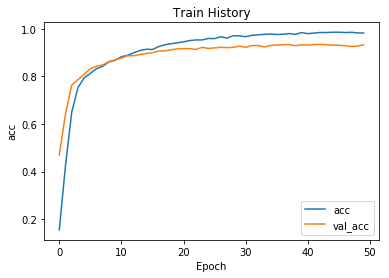

In [34]:
show_train_history(train_history, 'acc', 'val_acc')

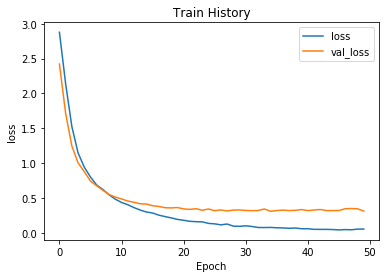

In [35]:
show_train_history(train_history, 'loss', 'val_loss')

In [47]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print(scores)

2026/2026 [==============================] - 1s 630us/step
[0.30185604757405926, 0.9368213226858744]


In [37]:
model.save('models/cmnist.h5')

In [55]:
def get_class(i):
    class_str = '0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'
    class_list = class_str.split()
    return class_list[i]

In [39]:
prediction = model.predict_classes(x_test_normalize)

In [46]:
x_test = x_test.reshape(x_test.shape[0], 28, 28)
y_test = y_test.reshape(y_test.shape[0], 28, 28)

In [68]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 400)
    for i in range(num):
        ax = plt.subplot(200, 10, 1 + i)
        ax.imshow(images[idx])
        L = get_class(labels[idx])
        P = get_class(prediction[idx])
        title = 'L: %s\nP: %s' % (L, P)
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

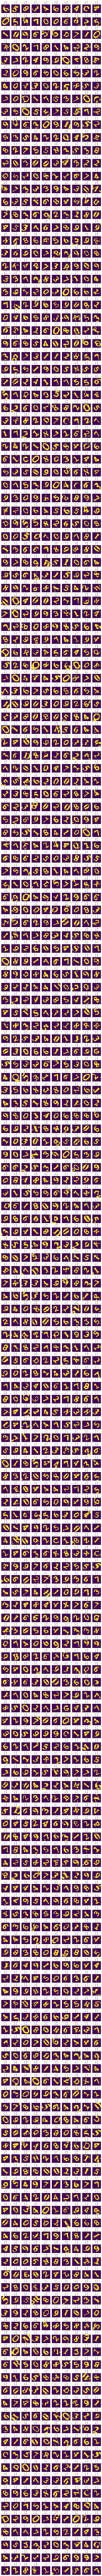

In [69]:
plot_images_labels_prediction(x_test, y_test, prediction, 0, 2000)